In [11]:
df = pd.read_csv("data/churn_data.csv")
df.head()


,CustomerID,Age,Tenure,Balance,NumProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,20000,56,10,164516.78,1,0,1,101573.25,0
1,20001,69,56,105932.34,3,0,1,70129.76,0
2,20002,46,30,163010.89,3,0,0,141714.73,0
3,20003,32,114,99618.15,3,0,0,90458.71,0
4,20004,60,109,13435.08,2,0,0,142154.70,0


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       800 non-null    int64  
 1   Age              800 non-null    int64  
 2   Tenure           800 non-null    int64  
 3   Balance          800 non-null    float64
 4   NumProducts      800 non-null    int64  
 5   HasCrCard        800 non-null    int64  
 6   IsActiveMember   800 non-null    int64  
 7   EstimatedSalary  800 non-null    float64
 8   Churn            800 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 56.4 KB


In [13]:
df.describe()


,CustomerID,Age,Tenure,Balance,NumProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,20399.5000,43.991250,59.405000,99984.807237,1.978750,0.467500,0.490000,87164.890150,0.031250
std,231.0844,14.864298,35.125785,57035.183012,0.814941,0.499255,0.500213,36816.816949,0.174101
min,20000.0000,18.000000,1.000000,47.500000,1.000000,0.000000,0.000000,20408.320000,0.000000
25%,20199.7500,31.750000,29.000000,50504.607500,1.000000,0.000000,0.000000,56467.010000,0.000000
50%,20399.5000,45.000000,59.000000,103132.690000,2.000000,0.000000,0.000000,88400.205000,0.000000
75%,20599.2500,56.000000,90.000000,148716.872500,3.000000,1.000000,1.000000,118902.587500,0.000000
max,20799.0000,69.000000,119.000000,199870.700000,3.000000,1.000000,1.000000,149531.780000,1.000000


In [14]:
df['Churn'].value_counts()


Churn
0    775
1     25
Name: count, dtype: int64

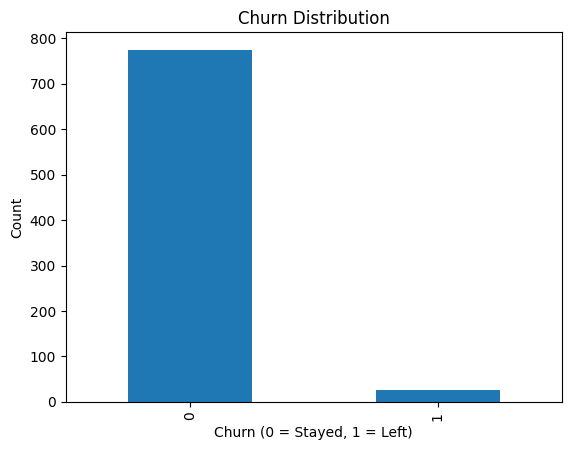

In [15]:
import matplotlib.pyplot as plt

df['Churn'].value_counts().plot(kind='bar')
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = Stayed, 1 = Left)")
plt.ylabel("Count")
plt.show()


In [16]:
X = df.drop(columns=["CustomerID", "Churn"])
y = df["Churn"]


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [18]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy:", accuracy)


Model Accuracy: 0.9625


In [20]:
import joblib
joblib.dump(model, "churn_model.pkl")


['churn_model.pkl']

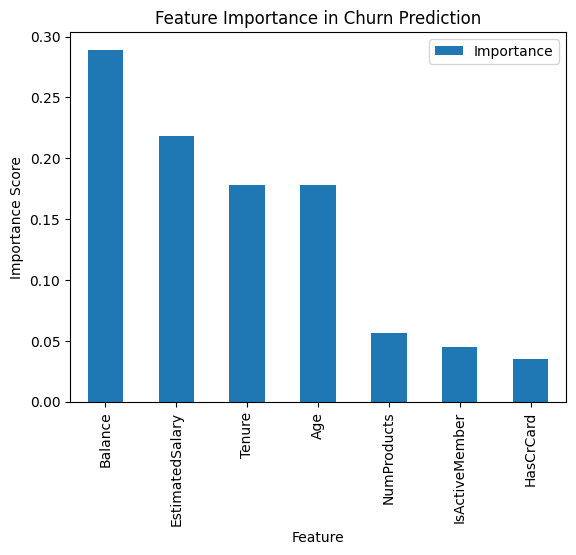

,Feature,Importance
2,Balance,0.289340
6,EstimatedSalary,0.218402
1,Tenure,0.178277
0,Age,0.177652
3,NumProducts,0.056450
5,IsActiveMember,0.044556
4,HasCrCard,0.035324


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = X.columns

fi = pd.DataFrame({"Feature": feature_names, "Importance": importances})
fi = fi.sort_values(by="Importance", ascending=False)

fi.plot(x="Feature", y="Importance", kind="bar")
plt.title("Feature Importance in Churn Prediction")
plt.ylabel("Importance Score")
plt.show()

fi
